In [1]:
import os

path = 'C:/Users/'+os.getlogin()+'/Google Drive/University/Dissertation'
datapath = 'C:/Users/'+os.getlogin()+'/Dissertation Data'

os.chdir(path)
os.getcwd()

'C:\\Users\\tom\\Google Drive\\University\\Dissertation'

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
batch_counts = { 'batch':  [-2, -1, 1,2,3,4,5,6,7,8,9,10,11,12,13,14,15],
                 'simple': [832,200, 45301, 33312, 24686, 16668, 10517, 7502, 4240, 2702, 1905, 1051, 450, 247, 123, 107, 57],
                 'w10p':   [1337, 29076, 94011, 79538, 69221, 56154, 48934, 38288, 30374, 22495, 19272, 11300, np.nan, np.nan, np.nan, np.nan, np.nan]
               }



In [4]:
bc_df = pd.DataFrame.from_dict(batch_counts)

bc_df

,batch,simple,w10p
0,-2,832,1337.0
1,-1,200,29076.0
2,1,45301,94011.0
3,2,33312,79538.0
4,3,24686,69221.0
5,4,16668,56154.0
6,5,10517,48934.0
7,6,7502,38288.0
8,7,4240,30374.0
9,8,2702,22495.0


In [5]:
bc_df2 = bc_df[bc_df.batch > 0].reset_index(drop=True)
bc_df2

,batch,simple,w10p
0,1,45301,94011.0
1,2,33312,79538.0
2,3,24686,69221.0
3,4,16668,56154.0
4,5,10517,48934.0
5,6,7502,38288.0
6,7,4240,30374.0
7,8,2702,22495.0
8,9,1905,19272.0
9,10,1051,11300.0


In [6]:
bc_df2['simp_perc'] = bc_df2.simple / bc_df2.simple.sum()
bc_df2['w10p_perc'] = bc_df2.w10p / bc_df2.w10p.sum()

bc_df2

,batch,simple,w10p,simp_perc,w10p_perc
0,1,45301,94011.0,0.304303,0.200199
1,2,33312,79538.0,0.223769,0.169379
2,3,24686,69221.0,0.165825,0.147408
3,4,16668,56154.0,0.111965,0.119582
4,5,10517,48934.0,0.070646,0.104206
5,6,7502,38288.0,0.050394,0.081535
6,7,4240,30374.0,0.028482,0.064682
7,8,2702,22495.0,0.018150,0.047904
8,9,1905,19272.0,0.012797,0.041040
9,10,1051,11300.0,0.007060,0.024064


In [7]:
from cycler import cycler

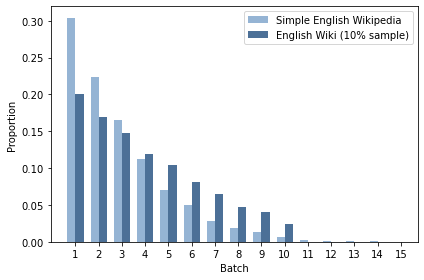

In [8]:
labels = bc_df2.batch
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

#plt.rc('axes', prop_cycle=(cycler('color', ) ))

plt.get_cmap('tab20')

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, bc_df2.simp_perc, width, color= ( 138/255, 172/255, 208/255 , 0.9), label='Simple English Wikipedia')
rects2 = ax.bar(x + width/2, bc_df2.w10p_perc, width, color= ( 56/255, 97/255, 140/255 , 0.9), label='English Wiki (10% sample)')



ax.set_ylabel('Proportion')
ax.set_xlabel('Batch')
#ax.set_title('Proportion of candidate n-grams assigned to each batch')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(loc = 'upper right')

fig.tight_layout()

fig.savefig(path+'/Content/Graphics/batch_distrib.png', dpi=300, transparent = True, bbox_inches = 'tight')
plt.show()